# Forecasting Household Electric Power using Keras
***
Dataset source: https://www.kaggle.com/uciml/electric-power-consumption-data-set

## Importing Library and Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'Datetime' : ['Date', 'Time']}, infer_datetime_format=True, 
                 index_col='Datetime', low_memory=False, na_values=['nan','?'])

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Data Preprocessing

In [3]:
print(f'There are {df.shape[0]} number of rows and {df.shape[1]} number of columns\n')
print(f'Columns with NULL:\n{df.isnull().sum()}')

There are 2075259 number of rows and 7 number of columns

Columns with NULL:
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [4]:
df.dropna(inplace=True)
print(f'There are {df.shape[0]} number of rows and {df.shape[1]} number of columns\n')
print(f'Columns with NULL:\n{df.isnull().sum()}')

There are 2049280 number of rows and 7 number of columns

Columns with NULL:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


## Exploratory Data Analysis
***

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

Above is the rule argument for resample()


### Plot out each column with monthly time series

In C:\Users\Jerem\Anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Jerem\Anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Jerem\Anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


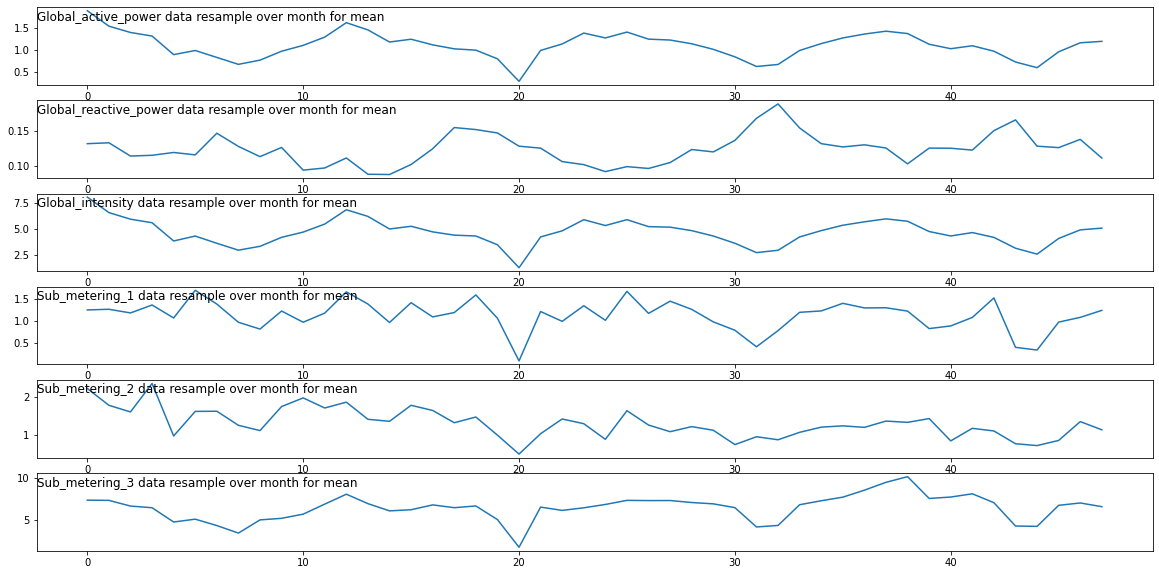

In [5]:
import matplotlib.pyplot as plt

i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

### Check if there are any correlations among the columns



In [6]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


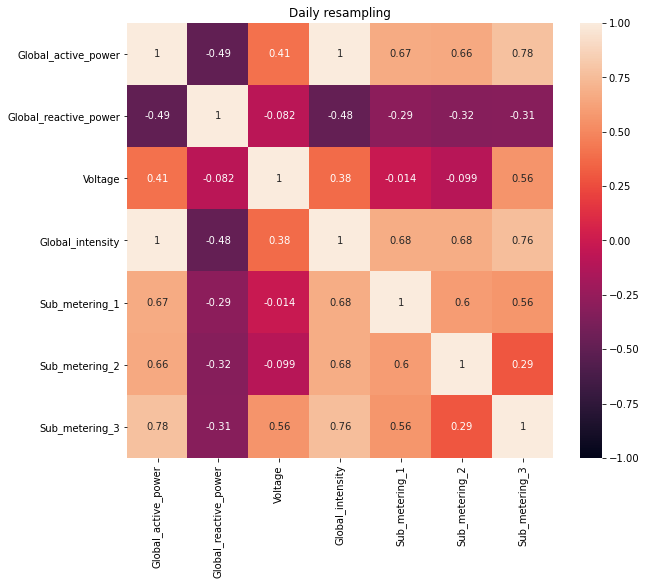

In [7]:
import seaborn as sns
f= plt.figure(figsize=(21,8))

ax=f.add_subplot(121)
dfd = df.resample('M').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)
plt.show()

Global_active_power and Global_intensity has high correlation.

I have chosen to predict Global_active_power

# Forecasting Global_active_power using keras

In [8]:
dfd = dfd[['Global_active_power']]

In [9]:
dfd.dropna(inplace=True) #dropna as there were some null values
dfd.head()

,Global_active_power
Datetime,
2006-12-31,1.901295
2007-01-31,1.546034
2007-02-28,1.401084
2007-03-31,1.318627
2007-04-30,0.891189


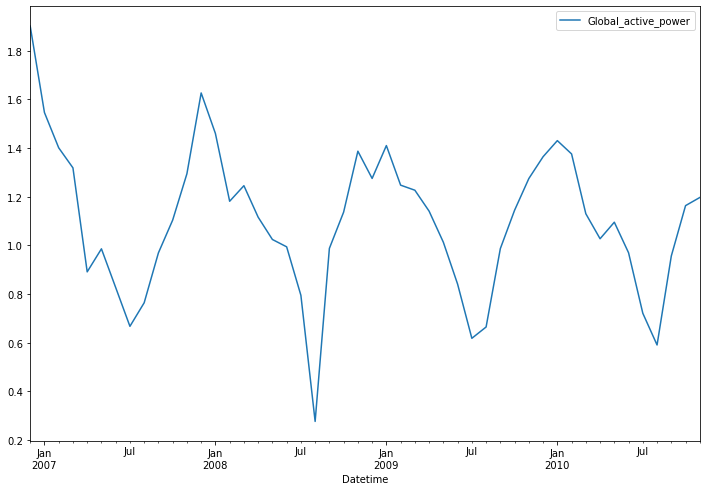

In [10]:
dfd.plot(figsize=(12,8));

#### Checking the length of dataframe dfd. dfd is a month resampled dataframe from df

In [11]:
len(dfd)

48

#### Split the data into a train and test where the test set is the last 6 months of data.

In [12]:
train = dfd.iloc[:-6]
test = dfd.iloc[-6:]

len(test)

6

#### Using MinMaxScaler to scale the train and test sets into scaled versions.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

#### Creating TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

### Create the Model

#### Creating Keras Sequential Model with 150 LSTM units and a final Dense Layer

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [17]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


#### Fit the model to the generator with 30 epochs

In [19]:
# fit model
model.fit(generator,epochs=30)

Epoch 1/30
30/30 [==============================] - 1s 3ms/step - loss: 0.2271
Epoch 2/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 3/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0642
Epoch 4/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0289
Epoch 5/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 6/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0382
Epoch 7/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0216
Epoch 8/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0223
Epoch 9/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 10/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 11/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 12/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 13/30
30/30 [==============================

#### Plot showing the history of the loss that occured during training

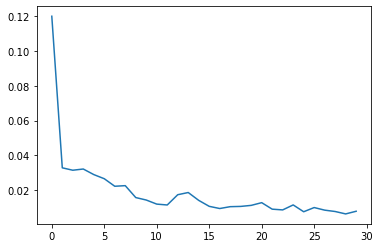

In [20]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

# Evaluating model on Test Data

#### Based on test data and input size, create an appropriately sized "first evaluation batch"

In [21]:
first_eval_batch = scaled_train[-6:]
first_eval_batch

array([[0.66957642],
       [0.71026083],
       [0.67661357],
       [0.52534679],
       [0.46208997],
       [0.50393446]])

In [22]:
first_eval_batch = first_eval_batch.reshape((1, 6, n_features))

#### Generate predictions into the same time stamps as the test set

In [23]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

#### Inverse Transform forecasted predictions

In [24]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[0.90525297],
       [0.79325198],
       [0.80860595],
       [1.0648841 ],
       [1.27791759],
       [1.4693212 ]])

#### Creating dataframe that has both the original test values and predictions

In [25]:
test['Predictions'] = true_predictions
test

C:\Users\Jerem\Anaconda3\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Global_active_power,Predictions
Datetime,,
2010-06-30,0.969615,0.905253
2010-07-31,0.721068,0.793252
2010-08-31,0.590778,0.808606
2010-09-30,0.956442,1.064884
2010-10-31,1.163399,1.277918
2010-11-30,1.196854,1.469321


#### Plot showing the test set against predicted values

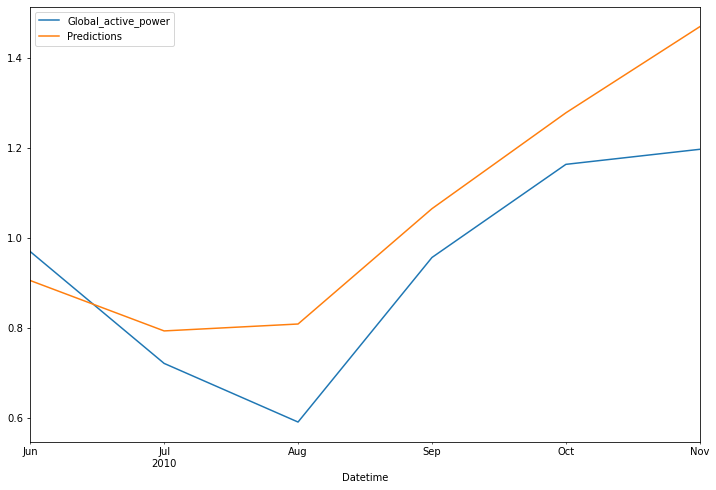

In [26]:
test.plot(figsize=(12,8))

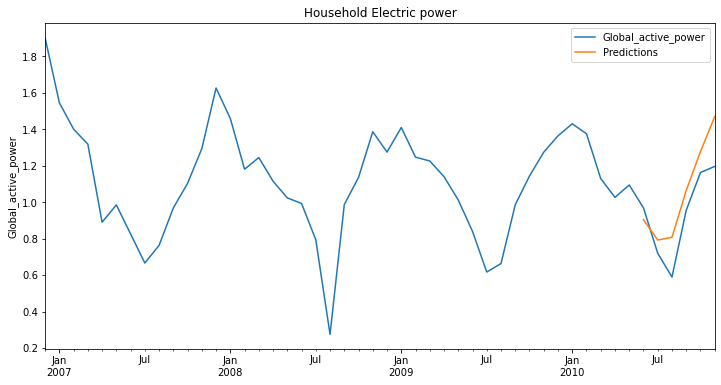

In [27]:
title='Household Electric power'
ylabel='Global_active_power'
xlabel=''

ax = dfd.plot(legend=True,figsize=(12,6),title=title)
test['Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# Forecasting into the future

In [28]:
scaler = MinMaxScaler()
dfd_scaled = scaler.fit_transform(dfd)

In [29]:
n_input = 24
n_features=1
generator = TimeseriesGenerator(dfd_scaled, dfd_scaled, length=n_input, batch_size=1)

## Create the Model

#### Creating Keras Sequential Model with 150 LSTM units and a final Dense Layer

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [31]:
# fit model
model.fit(generator,epochs=30)

Epoch 1/30
24/24 [==============================] - 1s 5ms/step - loss: 0.1268
Epoch 2/30
24/24 [==============================] - 0s 4ms/step - loss: 0.0208
Epoch 3/30
24/24 [==============================] - 0s 4ms/step - loss: 0.0219
Epoch 4/30
24/24 [==============================] - 0s 4ms/step - loss: 0.0333
Epoch 5/30
24/24 [==============================] - 0s 4ms/step - loss: 0.0287
Epoch 6/30
24/24 [==============================] - 0s 4ms/step - loss: 0.0268
Epoch 7/30
24/24 [==============================] - 0s 4ms/step - loss: 0.0199
Epoch 8/30
24/24 [==============================] - 0s 5ms/step - loss: 0.0250
Epoch 9/30
24/24 [==============================] - 0s 5ms/step - loss: 0.0421
Epoch 10/30
24/24 [==============================] - 0s 4ms/step - loss: 0.0236
Epoch 11/30
24/24 [==============================] - 0s 4ms/step - loss: 0.0214
Epoch 12/30
24/24 [==============================] - 0s 5ms/step - loss: 0.0287
Epoch 13/30
24/24 [==============================

#### Plot showing the history of the loss that occured during training

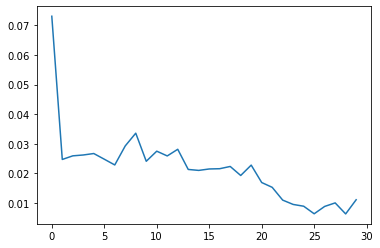

In [32]:
#Loss vs Epoch
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

In [33]:
first_eval_batch = scaled_train[-12:]
first_eval_batch = first_eval_batch.reshape((1, 12, n_features))

#### Generate predictions into the future

In [34]:
test_predictions = []

first_eval_batch = dfd_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(6):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

#### Inverse Transform forecasted predictions and stores it in variable true_predictions

In [35]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[1.11664424],
       [1.09569993],
       [1.05004641],
       [0.99665151],
       [0.93658508],
       [0.88393299]])

#### Get last date from dataframe. 

In [36]:
last_date = dfd.iloc[-1]
last_date.name

Timestamp('2010-11-30 00:00:00', freq='M')

#### Create placeholder on future dates to be predicted followed by filling placeholders with true_predictions

In [37]:
index = pd.date_range(last_date.name, periods=6, freq='M')
df_pred = pd.DataFrame(index=index, columns=['Prediction'])
df_pred['Prediction'] = true_predictions
df_pred

,Prediction
2010-11-30,1.116644
2010-12-31,1.095700
2011-01-31,1.050046
2011-02-28,0.996652
2011-03-31,0.936585
2011-04-30,0.883933


#### Plot showing the forecast into the future

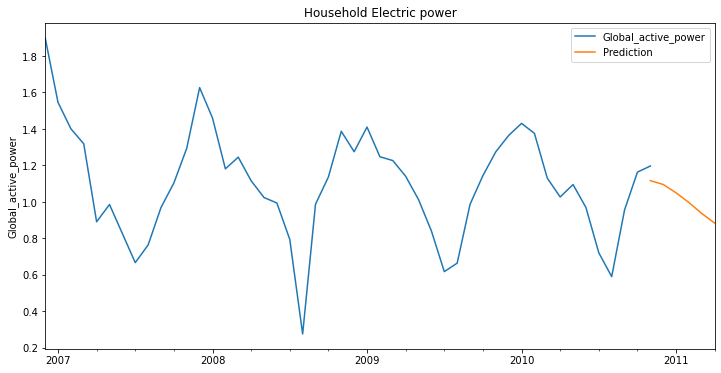

In [38]:
title='Household Electric power'
ylabel='Global_active_power'
xlabel=''

ax = dfd.plot(legend=True,figsize=(12,6),title=title)
df_pred['Prediction'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);